# Quality control routines for PNBOIA

In [168]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load PNBOIA data

In [169]:
df = pd.read_excel('../raw_data/vi.xlsx')

In [170]:
df.head()

,#ano,mes,dia,hora,lon,lat,battery,wspd1,gust1,wdir1,...,cdir1,cvel2,cdir2,cvel3,cdir3,wvht,wmax,dpd,mwd,spred
0,2015,10,13,17,-39.704233,-19.935850,-9999.0,10.5,12.6,76,...,251.02,341.60,230.34,335.93,237.40,1.56,2.54,8.0,86.7,31.3
1,2015,10,13,18,-39.704183,-19.935883,-9999.0,10.2,11.7,76,...,267.55,426.66,242.95,446.84,242.40,1.63,2.31,8.7,90.3,31.2
2,2015,10,13,19,-39.704100,-19.936000,-9999.0,10.9,13.4,75,...,243.35,407.95,242.24,358.29,238.35,1.82,3.09,8.7,82.6,31.1
3,2015,10,13,20,-39.703967,-19.936133,-9999.0,12.5,14.7,79,...,247.52,373.45,226.30,519.94,226.64,1.83,3.06,6.1,80.1,32.9
4,2015,10,13,21,-39.703933,-19.936117,-9999.0,11.4,13.6,73,...,278.33,439.41,276.01,510.14,268.65,1.85,2.73,5.6,76.2,32.7


## Create DateTime column

In [171]:
df['date_time'] = df['#ano'].astype(str).str.zfill(4) + df['mes'].astype(str).str.zfill(2) + df['dia'].astype(str).str.zfill(2) + df['hora'].astype(str).str.zfill(2)

In [172]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y%m%d%H')
df.set_index('date_time', inplace=True)

In [173]:
df.drop(columns=['#ano', 'mes', 'dia', 'hora'], inplace=True)

In [174]:
df.columns = ['lon', 'lat', 'battery', 'wspd1', 'gust1', 'wdir1', 'wspd2', 'gust2',
       'wdir2', 'atmp', 'rh', 'dewpt', 'pres', 'sst', 'compass', 'arad',
       'cspd1', 'cdir1', 'cspd2', 'cdir2', 'cspd3', 'cdir3', 'swvht', 'mxwvht',
       'tp', 'wvdir', 'spred']

In [175]:
df.head()

,lon,lat,battery,wspd1,gust1,wdir1,wspd2,gust2,wdir2,atmp,...,cdir1,cspd2,cdir2,cspd3,cdir3,swvht,mxwvht,tp,wvdir,spred
date_time,,,,,,,,,,,,,,,,,,,,,
2015-10-13 17:00:00,-39.704233,-19.935850,-9999.0,10.5,12.6,76,10.2,12.4,83,24.8,...,251.02,341.60,230.34,335.93,237.40,1.56,2.54,8.0,86.7,31.3
2015-10-13 18:00:00,-39.704183,-19.935883,-9999.0,10.2,11.7,76,10.0,11.7,83,24.9,...,267.55,426.66,242.95,446.84,242.40,1.63,2.31,8.7,90.3,31.2
2015-10-13 19:00:00,-39.704100,-19.936000,-9999.0,10.9,13.4,75,10.7,13.1,83,24.9,...,243.35,407.95,242.24,358.29,238.35,1.82,3.09,8.7,82.6,31.1
2015-10-13 20:00:00,-39.703967,-19.936133,-9999.0,12.5,14.7,79,12.3,14.3,87,25.0,...,247.52,373.45,226.30,519.94,226.64,1.83,3.06,6.1,80.1,32.9
2015-10-13 21:00:00,-39.703933,-19.936117,-9999.0,11.4,13.6,73,11.2,13.3,81,24.6,...,278.33,439.41,276.01,510.14,268.65,1.85,2.73,5.6,76.2,32.7


In [176]:
variables = df.drop(columns=['lon', 'lat', 'battery']).columns.to_list()

## Open limits for the data

In [177]:
mis_values = pnboia_limits.mis_value_axys_limits
limits = pnboia_limits.range_axys_limits
climate_limits = pnboia_limits.climate_axys_limits
stuck_limits = pnboia_limits.stuck_axys_limits
sigma_values = pnboia_limits.sigma_axys_limits
height = pnboia_limits.height
continuity_limit = pnboia_limits.continuity_axys_limits

## Create the class to start the qc tests

In [178]:
qc = QCChecks(data=df,
              variables=variables,
              mis_values=mis_values,
              limits=limits,
              climate_limits=climate_limits,
              stuck_limit=stuck_limits,
              sigma_values=sigma_values,
              continuity_limit=continuity_limit,
              height=height
             )

## Misvalue test

In [179]:
for parameter in mis_values.keys():
    qc.mis_value_check(parameter=parameter)

## Range test

In [180]:
for parameter in limits.keys():
    qc.range_check(parameter=parameter)

## Climate range test

In [181]:
for parameter in climate_limits.keys():
    qc.range_check_climate(parameter=parameter)

## Comparison between swvht and mxwvht

In [182]:
qc.swvht_mxwvht_check(swvht_name = 'swvht', mxwvht_name = 'mxwvht')

## Comparison of wind speed and gust

In [183]:
qc.wind_speed_gust_check(wspd_name='wspd1', gust_name='gust1')
qc.wind_speed_gust_check(wspd_name='wspd2', gust_name='gust2')

## Comparison of Dewpt and Atmp

In [184]:
qc.dewpt_atmp_check(dewpt_name='dewpt', atmp_name='atmp')

## Comparison of battery and pressure

In [185]:
qc.bat_sensor_check(battery_name='battery', pres_name='pres')

## Stuck sensor test

In [186]:
for parameter in variables:
    if parameter != 'battery':
        print(parameter)
        qc.stuck_sensor_check(parameter=parameter)

wspd1
gust1
wdir1
wspd2
gust2
wdir2
atmp
rh
dewpt
pres
sst
compass
arad
cspd1
cdir1
cspd2
cdir2
cspd3
cdir3
swvht
mxwvht
tp
wvdir
spred


## Convert wind to 10 meters

In [187]:
qc.convert_10_meters(wspd_name='wspd1', gust_name='gust1')
qc.convert_10_meters(wspd_name='wspd2', gust_name='gust2')

## Select the best anemometer

In [188]:
qc.related_meas_check(parameters=['wspd1', 'wspd2', 'wdir1', 'wdir2', 'gust1', 'gust2'])

## Time continuity test

In [190]:
for parameter in sigma_values.keys():
    print(parameter)
    qc.t_continuity_check(parameter=parameter)

swvht
rh
pres
atmp
wspd
sst


## Front exception tests

In [194]:
qc.front_except_check1(wdir_name='wdir', atmp_name='atmp')

In [195]:
qc.front_except_check3(wspd_name='wspd', atmp_name='atmp')

In [196]:
qc.front_except_check4(pres_name='pres', wspd_name='wspd')

In [197]:
qc.front_except_check5(pres_name='pres')

In [200]:
qc.front_except_check6(wspd_name='wspd', swvht_name='swvht')

## Plots to compare data

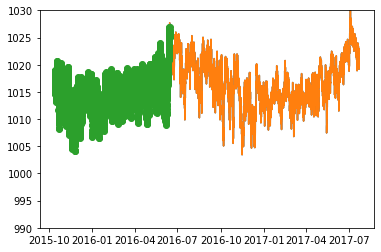

In [203]:
qc.plot_comparison(parameter='pres',ylim=[990,1030])